# Dealing with imbalanced datasets

# Christian Barra
# PyData Wroclaw - 21/08/2017

### Questions? Save them for later!

# Hey there!

# I am (freelancer U consultant U trainer) ∩ Python 🐍

# @christianbarra
# me@chrisbarra.xyz

Before diving into our data.

## What is an imbalanced dataset?

An imbalanced dataset, when we are talking about a binary classification problem, **is a dataset where the distribution of our dataset is skewed toward 1 class**.


## In other words we have many more samples of one class and a lot, a lot less of the class we want to predict.

Generally you consider a dataset imbalanced when the class that you want to predict counts for only 30% of your samples.

There is not a lower boundary.

100/1000, 10/1000, 1/1000, depending from your context the dataset could be very imbalanced.

# This is a plot of an imbalanced dataset

![alt text](http://www.svds.com/wp-content/uploads/2016/08/messy.png)

# Is this relevant to you?

### Do you want to predict the churn rate? Yes.
### Do you want to predict drop out inside your company? Yes.
### Will this user convert? Yes.

# Let's start!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_data = pd.read_csv("data/churn_telco.csv", sep=";", decimal=",")

In [3]:
my_data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


# features: 20
# label: (0,1) Churn
# Samples: 3333 

In [5]:
len(my_data[my_data['Churn'] == 0])

2850

In [6]:
len(my_data[my_data['Churn'] == 1])

483

In [7]:
(len(my_data[my_data['Churn'] == 1]) / my_data.shape[0]) * 100

14.491449144914492

## 14.5 % of our samples churned

# Let's check if we have NaN values

In [8]:
my_data[pd.isnull(my_data).any(axis=1)]

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone


In [9]:
my_data.corr()[(my_data.corr() > 0.20) | (my_data.corr() < -0.20)]['Churn']

Account Length         NaN
VMail Message          NaN
Day Mins          0.205151
Eve Mins               NaN
Night Mins             NaN
Intl Mins              NaN
CustServ Calls    0.208750
Churn             1.000000
Int'l Plan        0.259852
VMail Plan             NaN
Day Calls              NaN
Day Charge        0.205151
Eve Calls              NaN
Eve Charge             NaN
Night Calls            NaN
Night Charge           NaN
Intl Calls             NaN
Intl Charge            NaN
Area Code              NaN
Name: Churn, dtype: float64

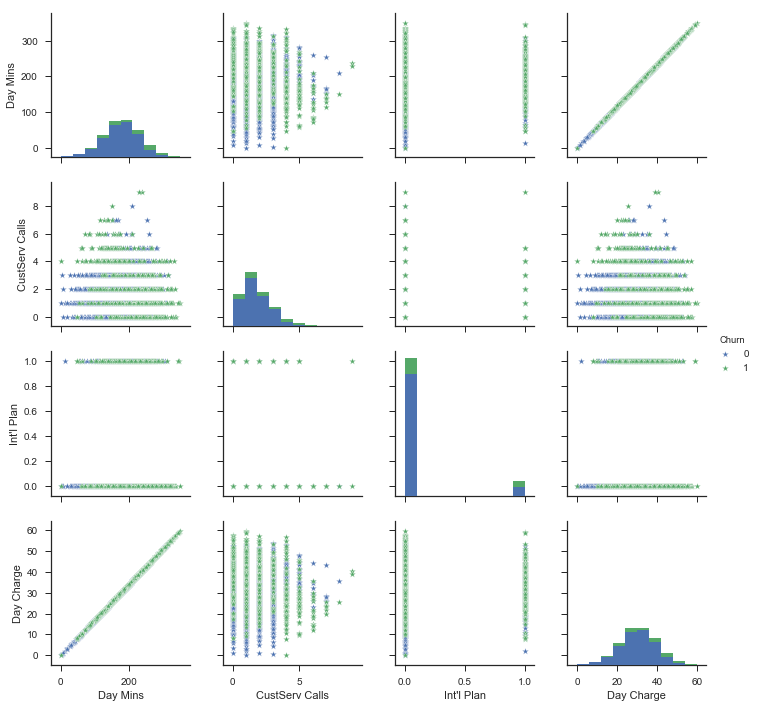

In [10]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(my_data, vars=["Day Mins","CustServ Calls", "Int'l Plan" , "Day Charge"], hue="Churn", markers="*")
plt.show()

In [11]:
features = my_data.copy()
features_hot_encoded = pd.get_dummies(features, columns=["State"])
features_hot_encoded.shape

(3333, 71)

In [12]:
label = features_hot_encoded['Churn']
features_hot_encoded = features_hot_encoded.drop(["Churn","Phone"], axis=1)

In [13]:
features_hot_encoded.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,0,0,0,0,0,0,0,0,0,0


# First try
## Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, roc_curve, 
                             confusion_matrix, classification_report, auc)
from utils import plot_confusion_matrix

In [15]:
classes = ("Not churned", "Churned")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_hot_encoded, label, test_size=0.20, random_state=42)

In [17]:
clf = LogisticRegression()
clf.fit(X_train.values, y_train.values)
y_predicted = clf.predict(X_test.values)

In [18]:
# Accuracy measures the similarity of the test and predicted Y
accuracy_score(y_test, y_predicted)

0.8500749625187406

# awesome!
0.85 accuracy after the first iteration

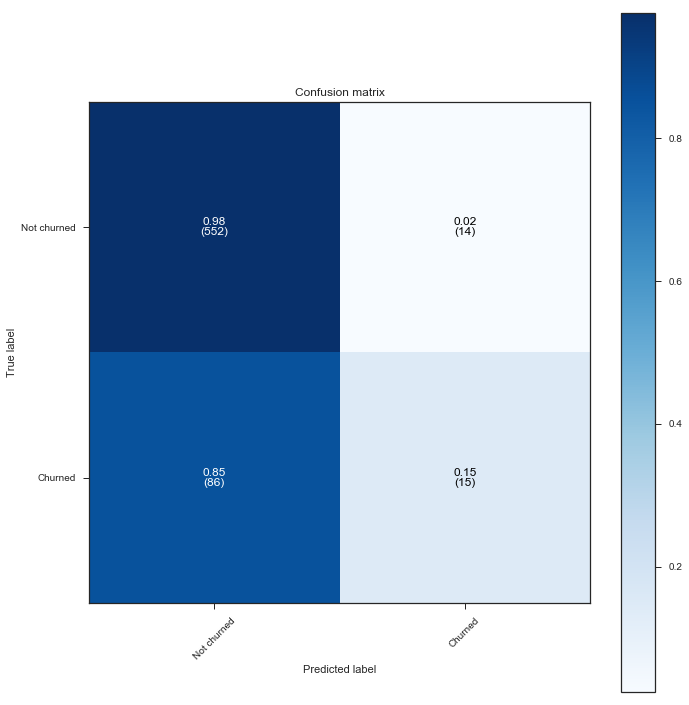

In [19]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cm, classes=classes, title='Confusion matrix')

Accuracy is probably the worst metric you can use when you deal with imbalanced datasets.

Whichever metric you decide to use, don't forget to plot a confusion matrix, it tells you honestly how well your model is doing.

Other metrics that you can use are precision, recall and f1-score.

It is also common to use the ROC curve and AUC (Area Under the Curve) but they could be misleding for imbalanced datasets.

In [20]:
print(classification_report(y_test, y_predicted, target_names=classes))

             precision    recall  f1-score   support

Not churned       0.87      0.98      0.92       566
    Churned       0.52      0.15      0.23       101

avg / total       0.81      0.85      0.81       667



# Small intro to metrics
**Precision** is a metric that shows how `precise` is the algorithm in finding true positive

**Recall** is a metric that shows how `good` is the algorithm in finding positives

**F1-score** is built using precision and recall

This is the formula for F1-score:
\begin{equation*}
F_{1}= 2\times \frac {\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
\end{equation*}

**Support** is the number of positive and negative samples


In [21]:
# Here we are genereting the ROC curve, we are going to compare them later
y_score = clf.decision_function(X_test.values)
first_model_fpr, first_model_tpr, _ = roc_curve(y_test, y_score)

# Change classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
clf = AdaBoostClassifier()
clf.fit(X_train.values, y_train.values)
y_predicted = clf.predict(X_test.values)
accuracy_score(y_test, y_predicted), f1_score(y_test, y_predicted)

(0.87256371814092959, 0.44444444444444448)

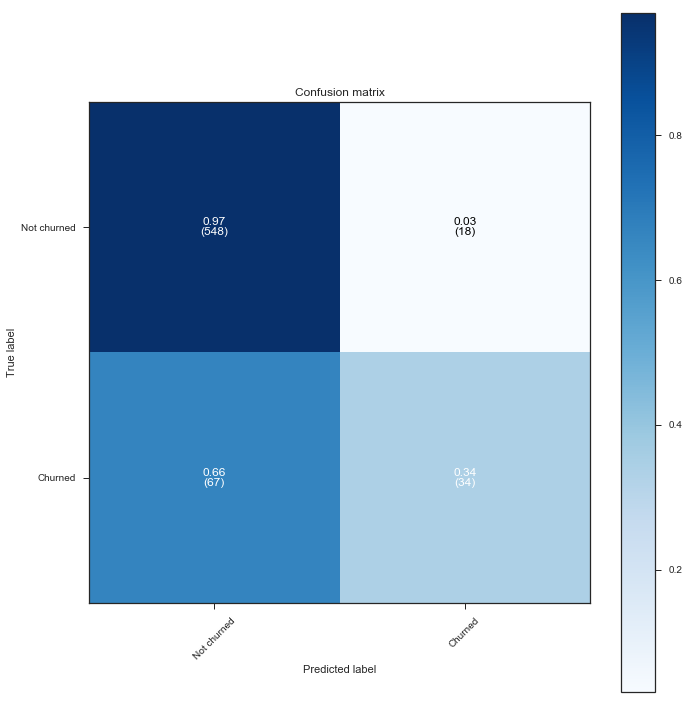

In [24]:
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cm, classes=classes, title='Confusion matrix')

AdaBoost is an ensemble algorithm and it works well with imbalanced dataset.

**But the model still fails somehow, it can easily misclassified _Churned_ for _Not churned_.**

In [25]:
y_score = clf.decision_function(X_test.values)
second_model_fpr, second_model_tpr, _ = roc_curve(y_test, y_score)

In [26]:
print(classification_report(y_test, y_predicted, target_names=classes))

             precision    recall  f1-score   support

Not churned       0.89      0.97      0.93       566
    Churned       0.65      0.34      0.44       101

avg / total       0.86      0.87      0.85       667



# Not good enough.

## I can't ship this in production.

## How can we deal with this?

2 techniques:
* sampling (over*, under*, and hybrid techniques that use clustering)
* weighted learning (changing the cost function, like AdaBoost)

# There are many techniques and papers.
# We will use RUSBoost
__R__andom__U__nder__S__ampling__Boost__ing

Boosting in a general ensemble technique (like Adaboost and XGBoost)

In [27]:
from utils import clean_data
from utils import random_under_sampling
from utils import plot_score_curve

data = pd.get_dummies(my_data.copy(), columns=["State"])

KFOLD = 5
NREPEATS = 5

cm_s = []
scores = np.array([])
best_auc = 0
worst_auc = 1 
best_fpr = best_tpr = None
worst_fpr = worst_tpr = None

In [28]:
for train, test in random_under_sampling(data, KFOLD, NREPEATS):
    # learning process
    clf = AdaBoostClassifier()
    X_train, y_train, X_test, y_test = clean_data(train, test)
    clf.fit(X_train.values, y_train.values)
    y_predicted = clf.predict(X_test)
    
    y_score = clf.decision_function(X_test.values)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    value_auc = auc(fpr, tpr)
    
    if value_auc > best_auc:
        best_auc = value_auc
        best_fpr = fpr
        best_tpr = tpr
    
    if value_auc < worst_auc:
        worst_auc = value_auc
        worst_fpr = fpr
        worst_tpr = tpr

    cm_s.append(confusion_matrix(y_test, y_predicted))
    f1_score_ = np.array([f1_score(y_test, y_predicted)])
    scores = np.concatenate((scores, f1_score_))

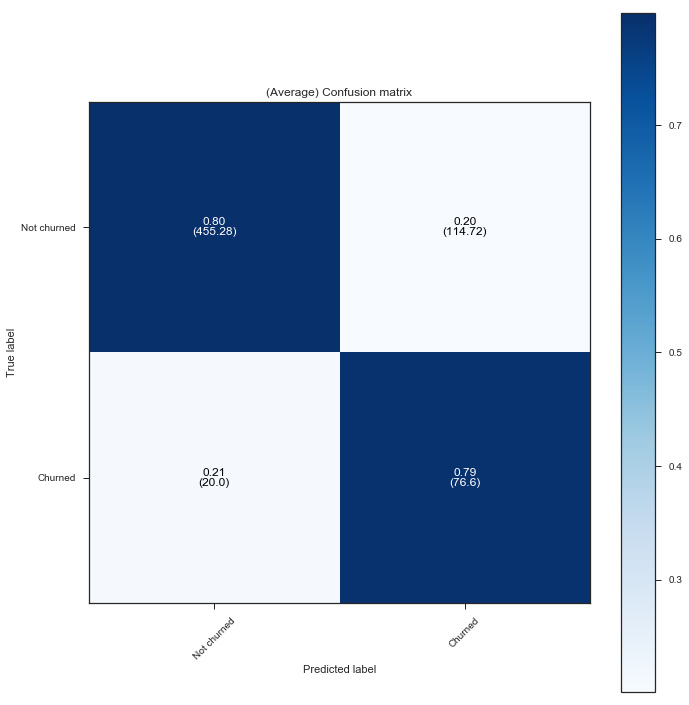

In [29]:
cm = np.sum(i for i in cm_s) / len(cm_s)
plot_confusion_matrix(cm, classes=classes, title='(Average) Confusion matrix')

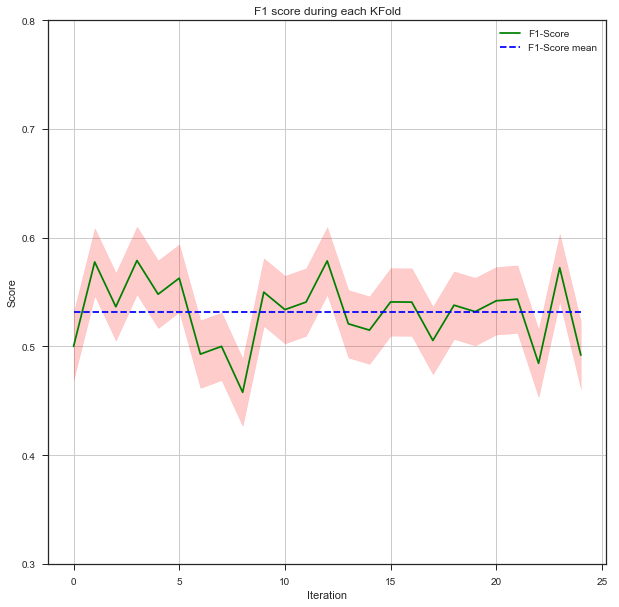

In [30]:
title = "F1 score during each KFold"
plot_score_curve(title, scores, (0.3, 0.8))

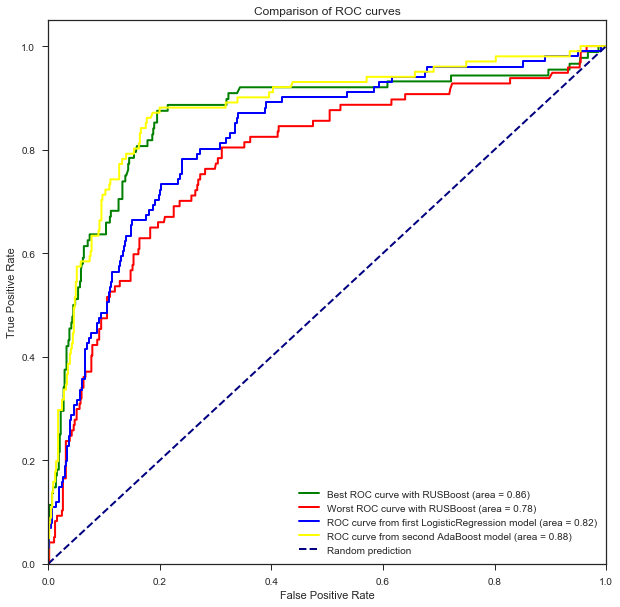

In [31]:
plt.figure(figsize=(10,10))

plt.plot(best_fpr, best_tpr, color='green',
         lw=2, label='Best ROC curve with RUSBoost (area = %0.2f)' % auc(best_fpr, best_tpr))

plt.plot(worst_fpr, worst_tpr, color='red',
         lw=2, label='Worst ROC curve with RUSBoost (area = %0.2f)' % auc(worst_fpr, worst_tpr))

plt.plot(first_model_fpr, first_model_tpr, color='blue',
         lw=2, label='ROC curve from first LogisticRegression model (area = %0.2f)' % auc(first_model_fpr, first_model_tpr))

plt.plot(second_model_fpr, second_model_tpr, color='yellow',
         lw=2, label='ROC curve from second AdaBoost model (area = %0.2f)' % auc(second_model_fpr, second_model_tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random prediction')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC curves')
plt.legend(loc="lower right")
plt.show()

**As you can see the ROC curve doesn't discriminate properly bad and good models.**

For example the first model that was using LogisticRegression has an AUC of 0.82 when it was just returning the negative samples most of the time.

The best metrics to use are probably are the confusion matrix, classification report with precision, recall and f1-score.

Instead of the ROC curve you can consider the Precision-Recall curve.

In [32]:
print(classification_report(y_test, y_predicted, target_names=classes))

             precision    recall  f1-score   support

Not churned       0.94      0.77      0.85       564
    Churned       0.37      0.75      0.49       102

avg / total       0.86      0.76      0.79       666



# Conclusion

It's not easy to deal with imbalanced datasets.

The problem that you will face is not related only to the data but also to the proper metrics to use.

Specifically you can see that accuracy, ROC curve and AUC don't provide useful information to select a good model.


Thanks!

Don't forget: **Gimme a feedback!**

**https://goo.gl/JAuNP3**